Import the tidyverse.

In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Bars

Let's use the "diamonds" data set. Preview the first five rows of the diamonds dataset using the `head` function.  
(*Hint: try* `?head` *to get the help page for the* `head` *function*)

In [2]:
diamonds %>% head


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


Make a bar chart of the "cut" column. About how many rows are there for the cut category "Ideal"?

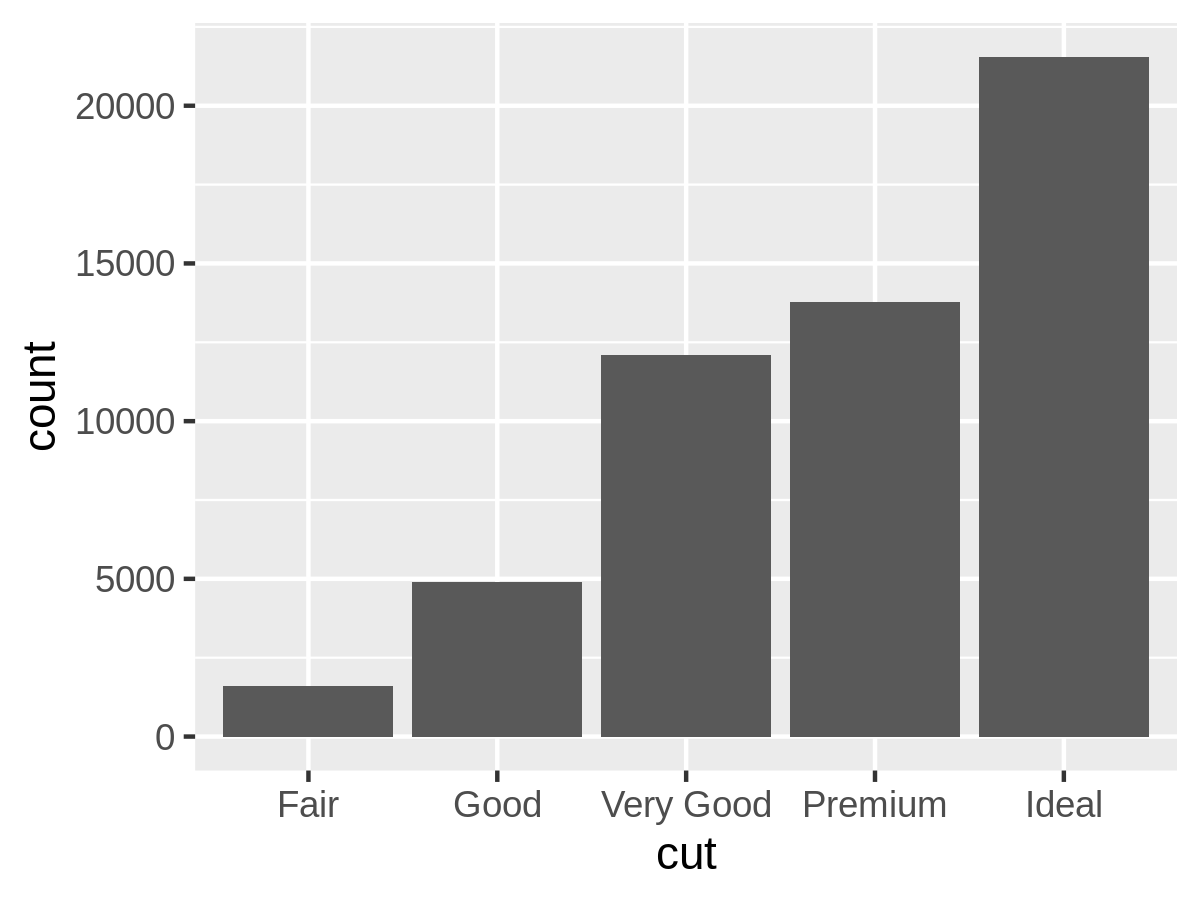

In [3]:
p= ggplot(diamonds, aes(x=cut))
p=p+geom_bar()
p

There are over 20000 rows for the "ideal" cut

Use `coord_flip` to rotate the chart by 90 degrees. 

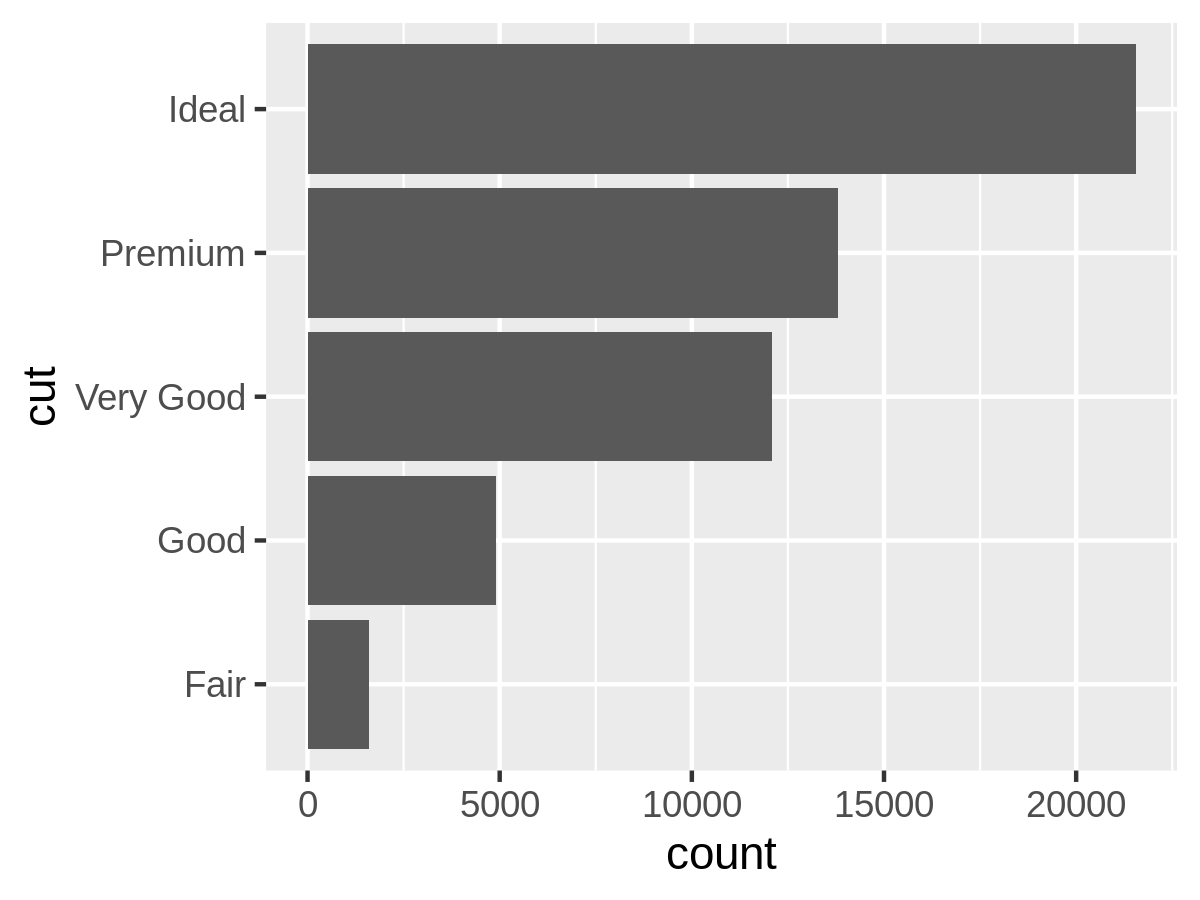

In [4]:
p=p+coord_flip()
p

# Lines

We'll use flight data from the Bureau of Transportation Statistics
https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0

In [5]:
# uncomment the following:

library(nycflights13)
flight.data = flights %>%
    group_by(month, carrier, year) %>%
    summarize(N_flights = n()) %>%
    filter(carrier %in% c('UA', 'AA', 'US'))

`summarise()` regrouping output by 'month', 'carrier' (override with `.groups` argument)



What are the columns in `flight.data`? (*Hint: preview the table*)

In [6]:
flight.data %>% head

month,carrier,year,N_flights
<int>,<chr>,<int>,<int>
1,AA,2013,2794
1,UA,2013,4637
1,US,2013,1602
2,AA,2013,2517
2,UA,2013,4346
2,US,2013,1552


The columns are month, carrier, year, and N_flights

First, make a bar chart of the `carrier` column? Does this make sense?

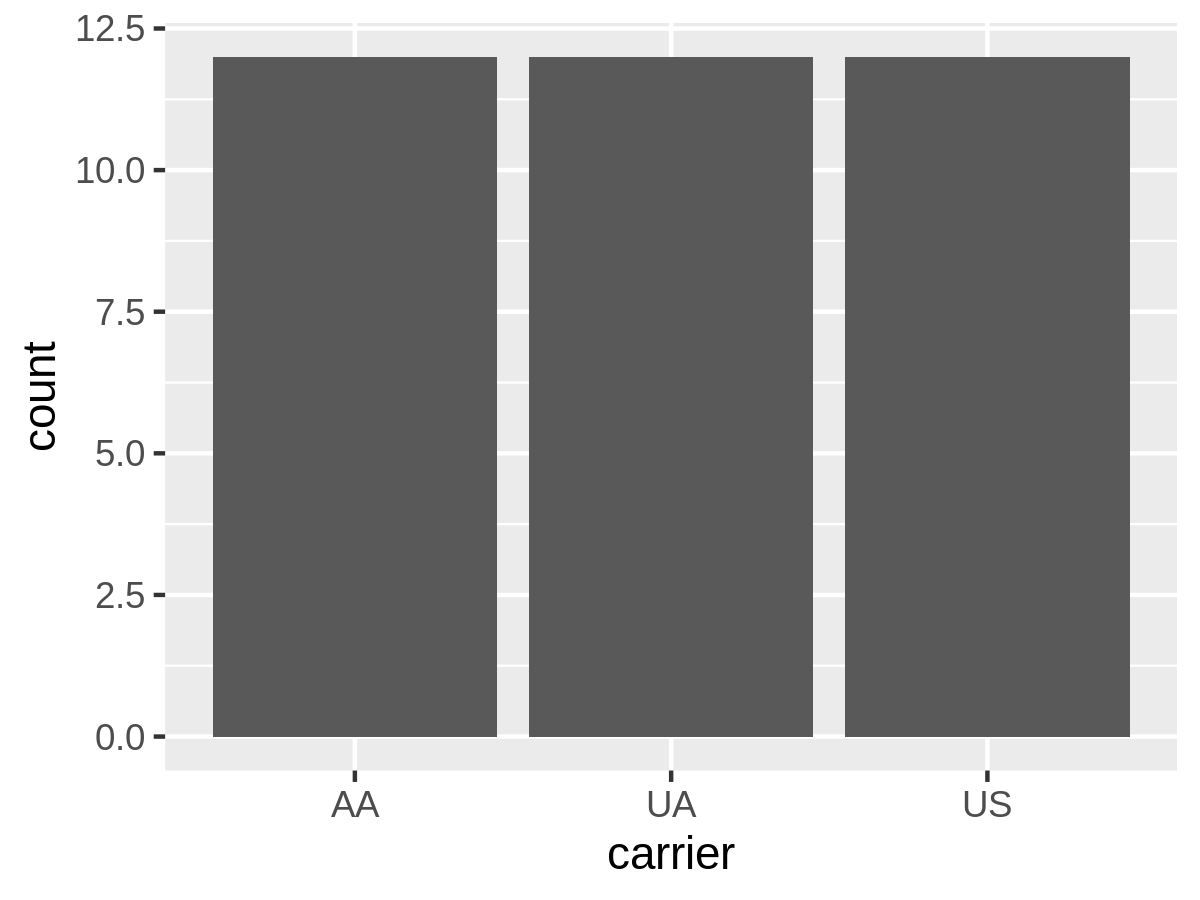

In [7]:
p.car= ggplot(flight.data, aes(x=carrier))
p.car= p.car+ geom_bar()
p.car

No because all the carriers have the same count

Plot month versus number of flights grouped according to carrier.

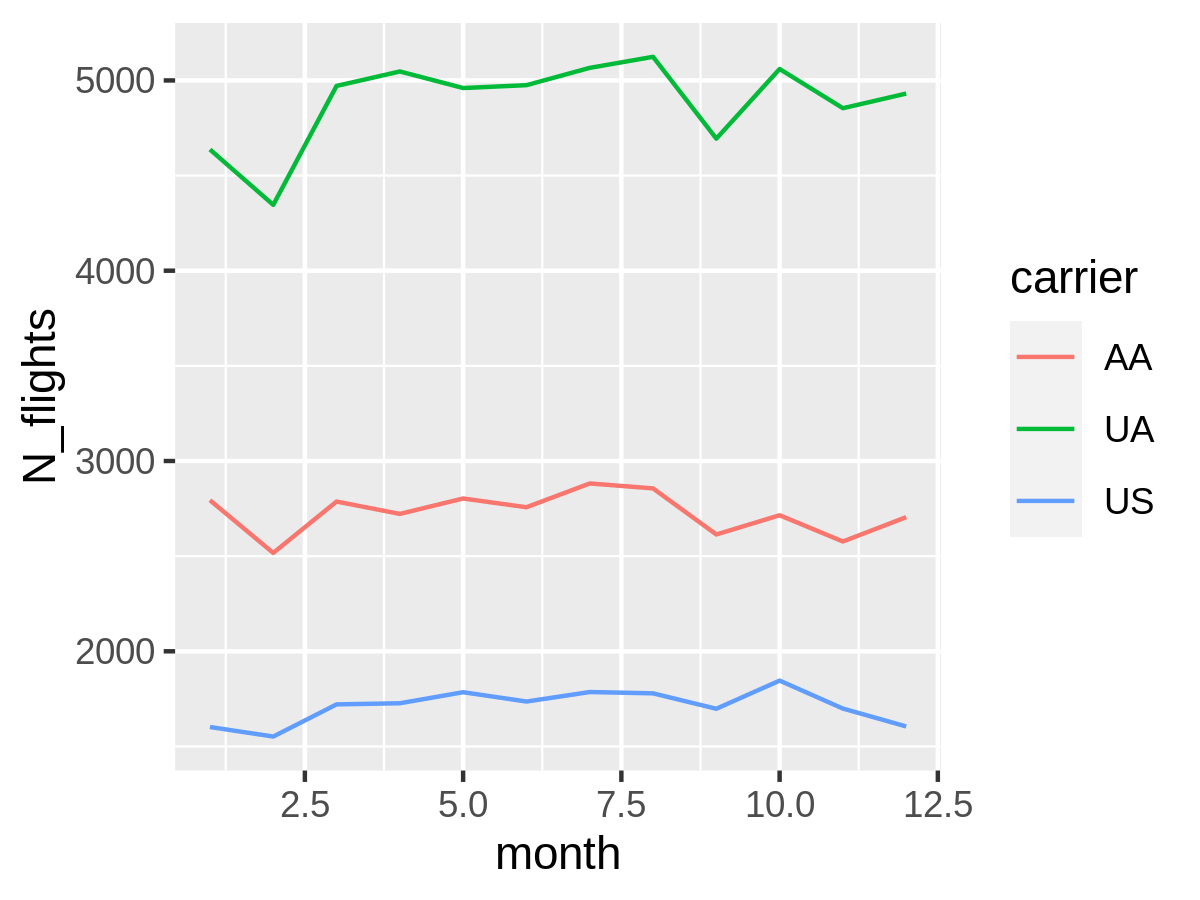

In [8]:
p = ggplot(flight.data, aes(x = month, y = N_flights, group=carrier, color=carrier))

p = p + geom_line()

p

# Smooth

Plot a scatter plot (`geom_point`) of carat versus price with the diamonds dataset.

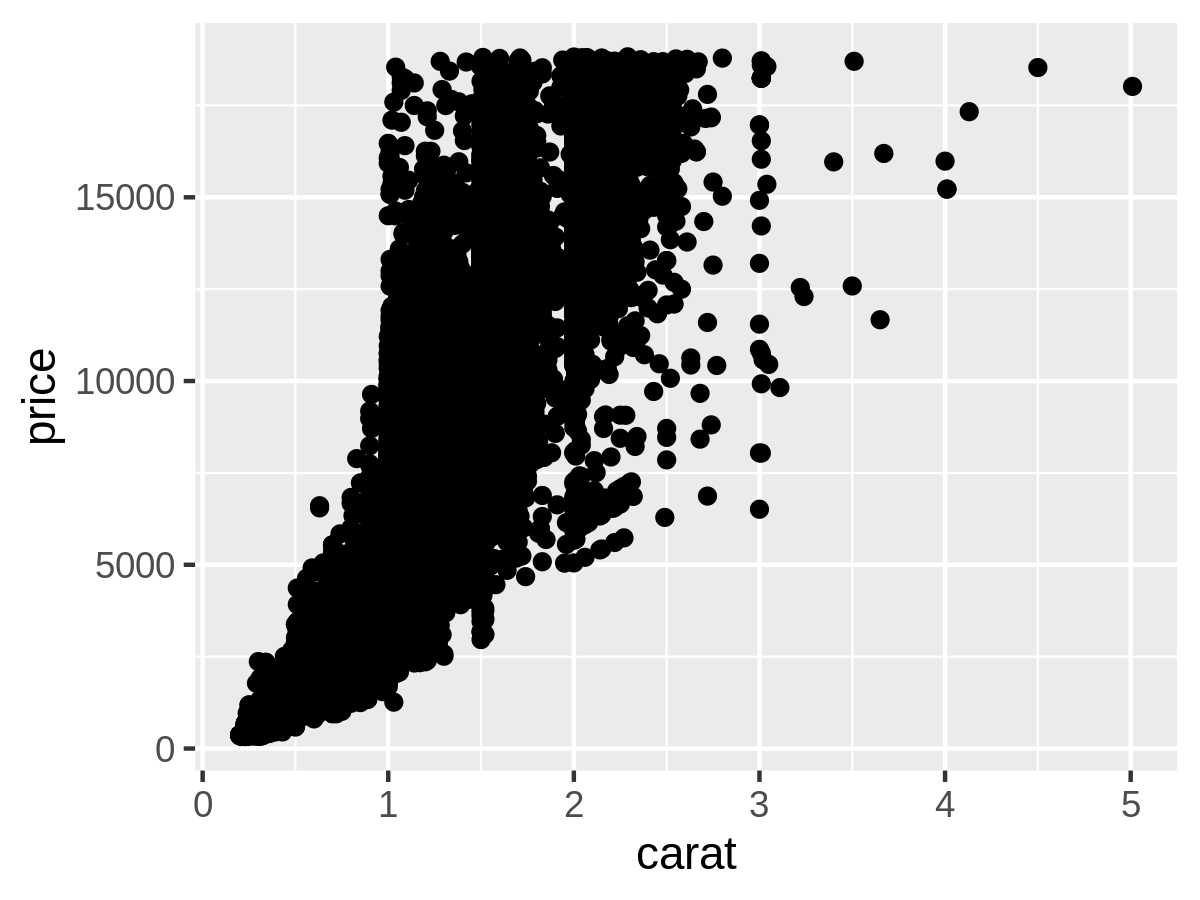

In [10]:
s= ggplot(diamonds, aes(x=carat, y=price))
s= s + geom_point()
s

There is a lot of overplotting in this figure. Make the same plot but use the `alpha` value to reduce
the opacity of the points.  
(*Hint: alpha values can be set from 0 (transparent) to 1 (opaque)*)

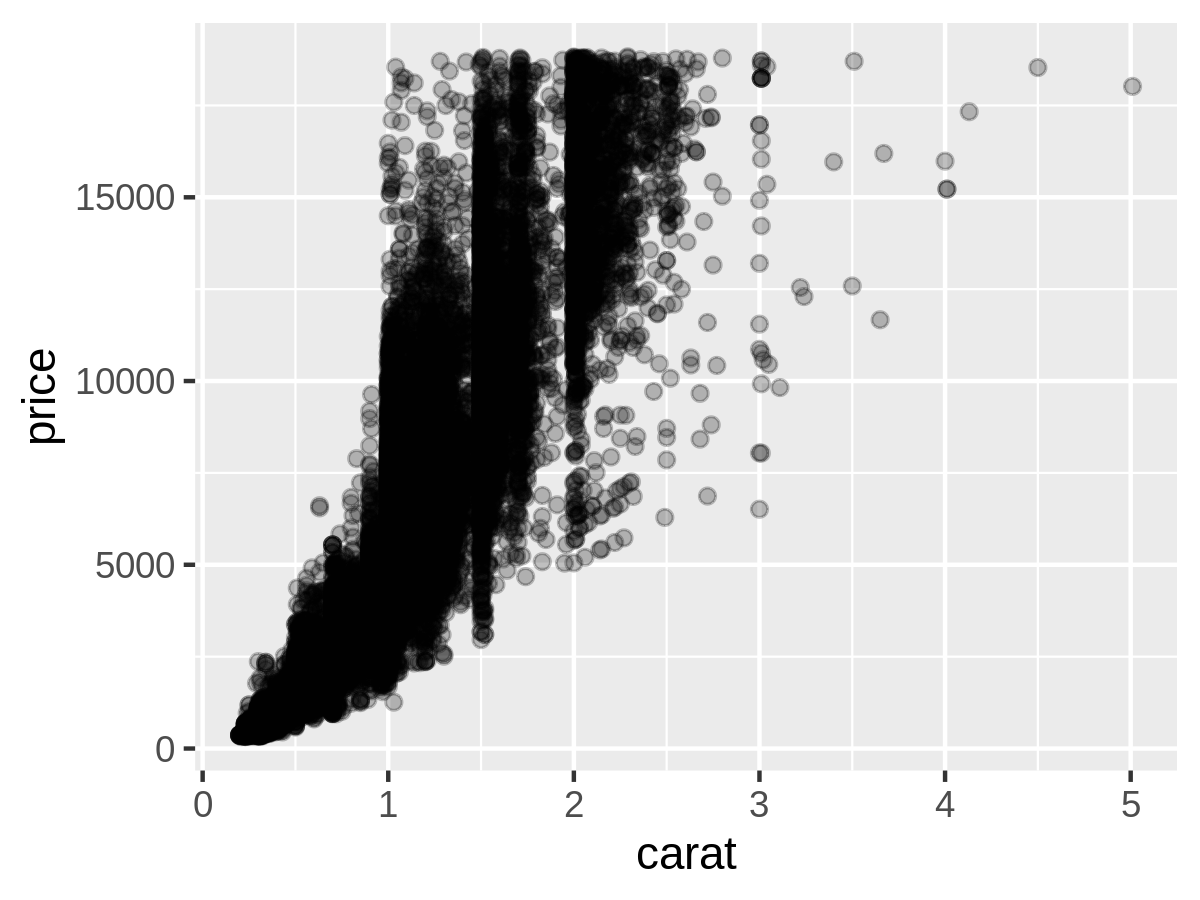

In [14]:
s= ggplot(diamonds, aes(x=carat, y=price))
s= s + geom_point(alpha=0.25)
s

Facetting can also help with overplotting. Facet the chart by `cut`.

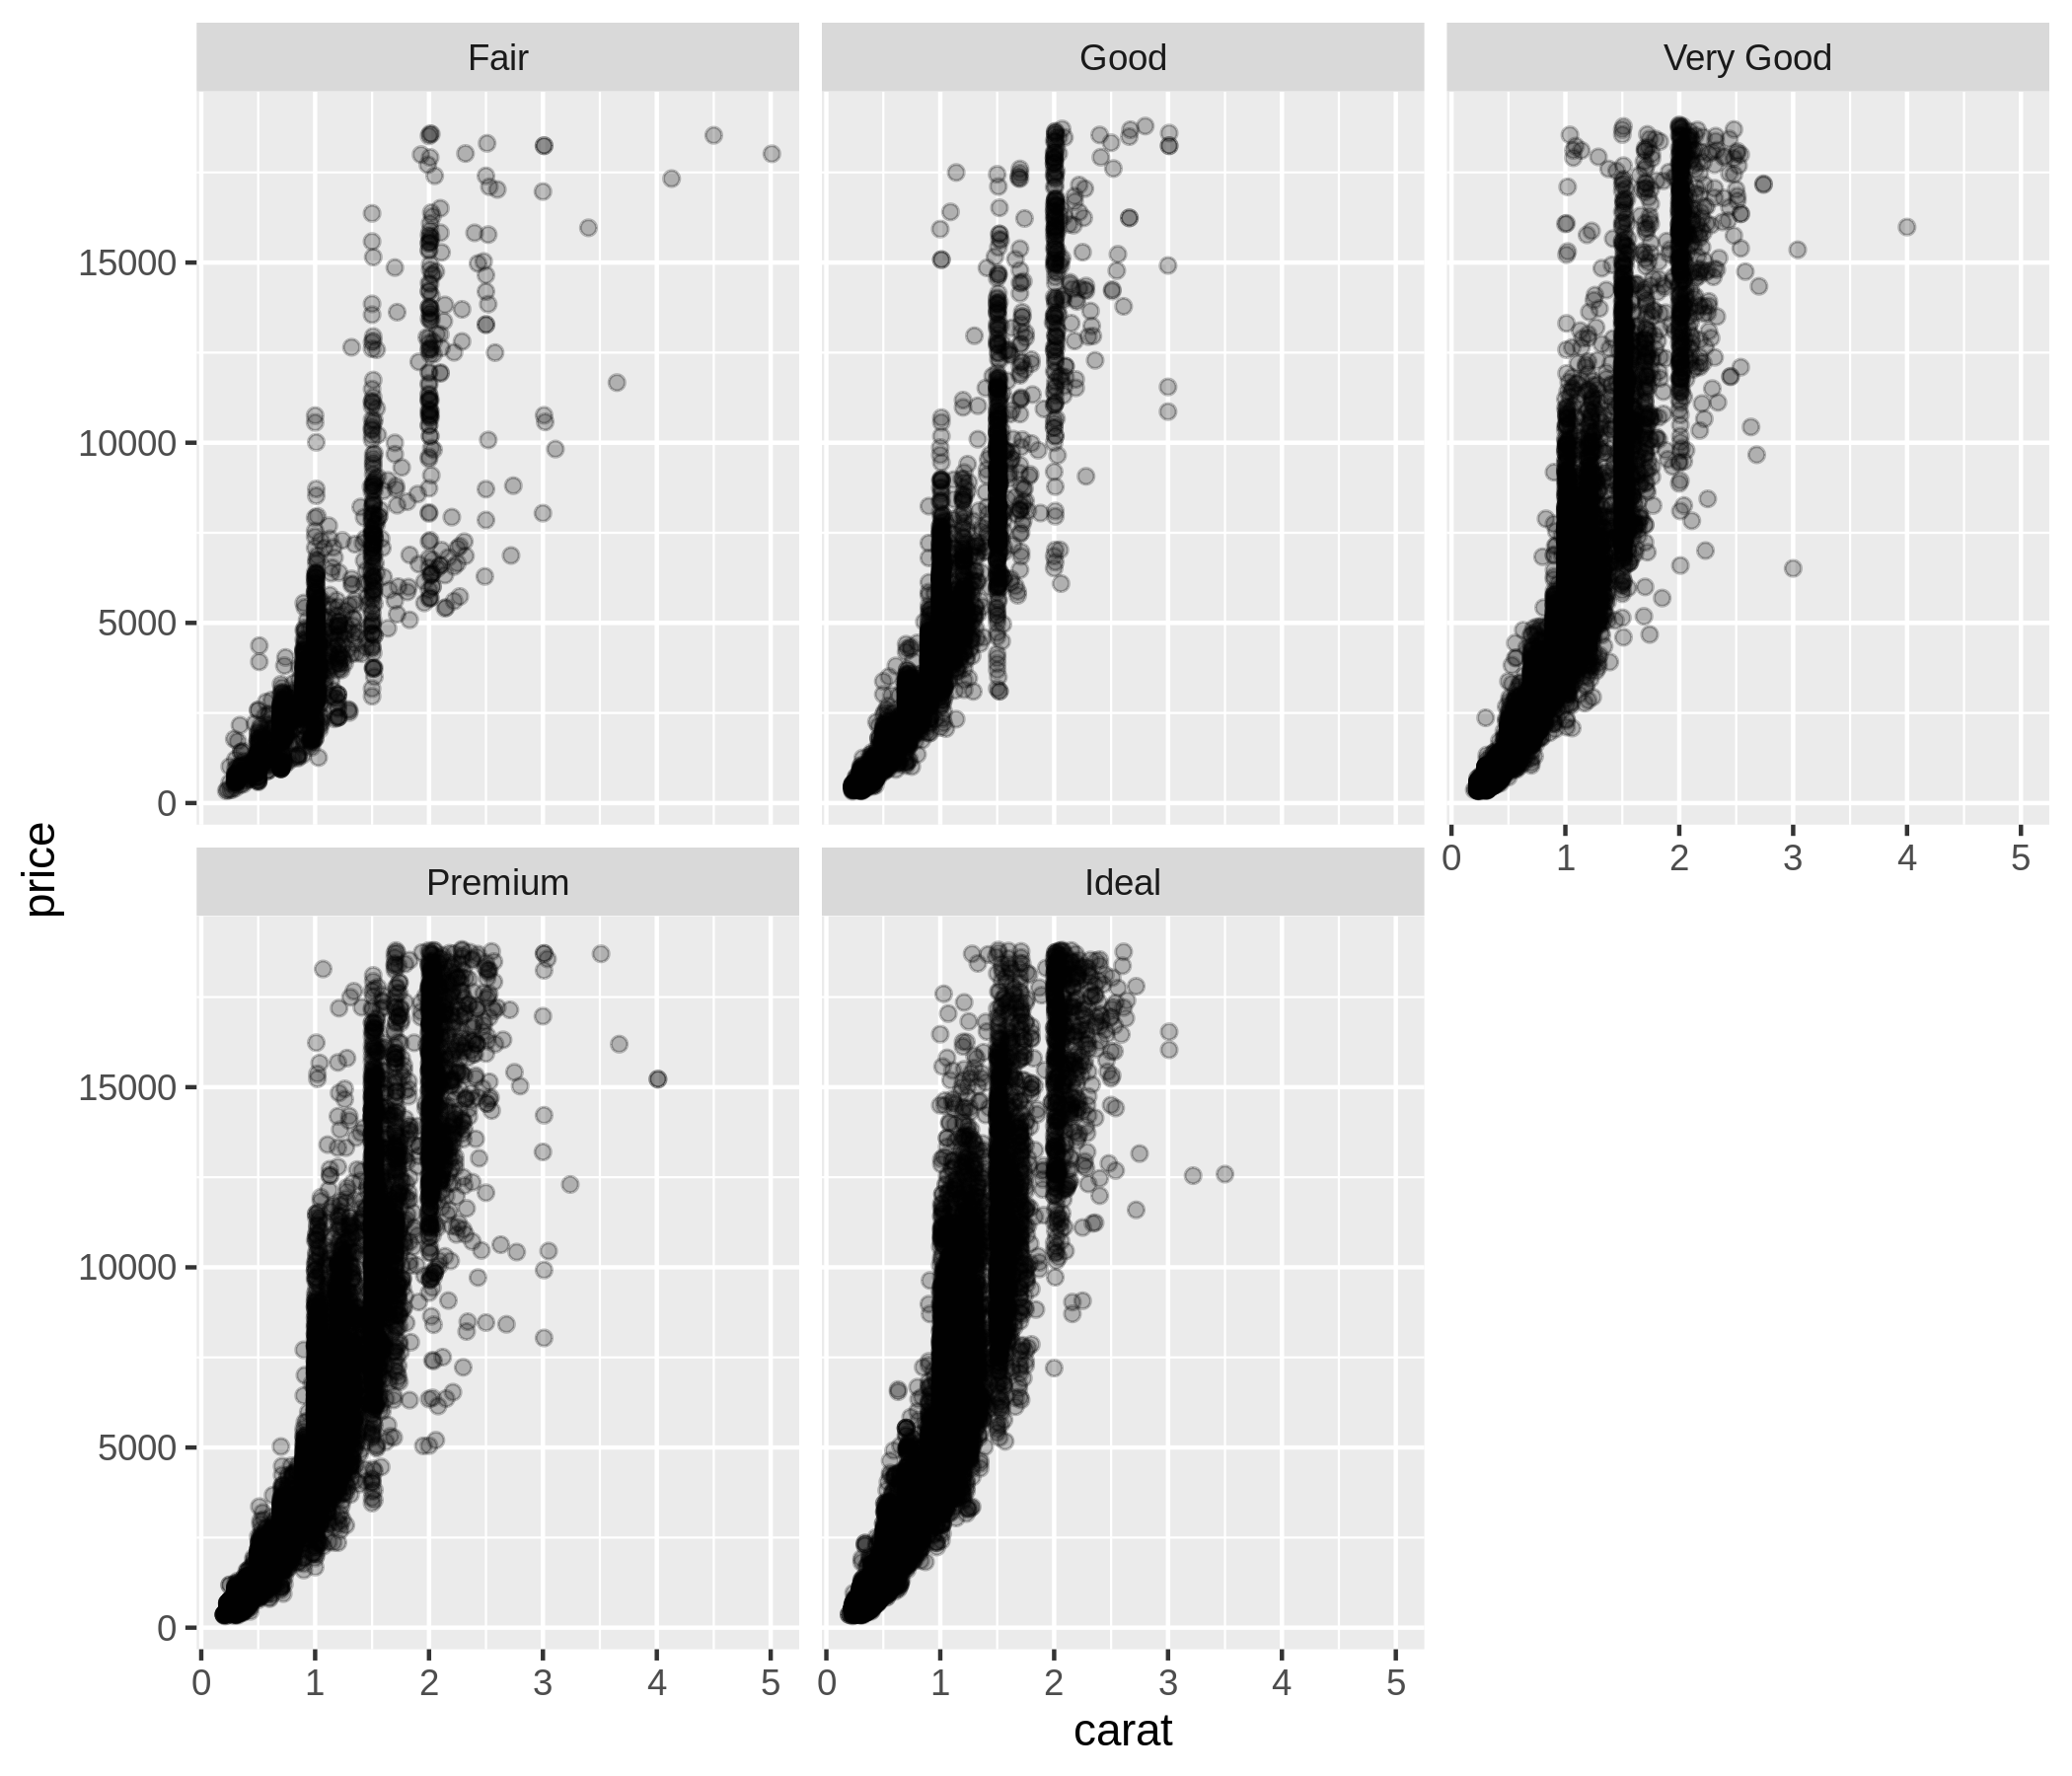

In [15]:
options(repr.plot.width=7, repr.plot.height=6)
s=s+facet_wrap(~cut)
s

Add a `geom_smooth` to your facetted plot to emphasize the trend in the data.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



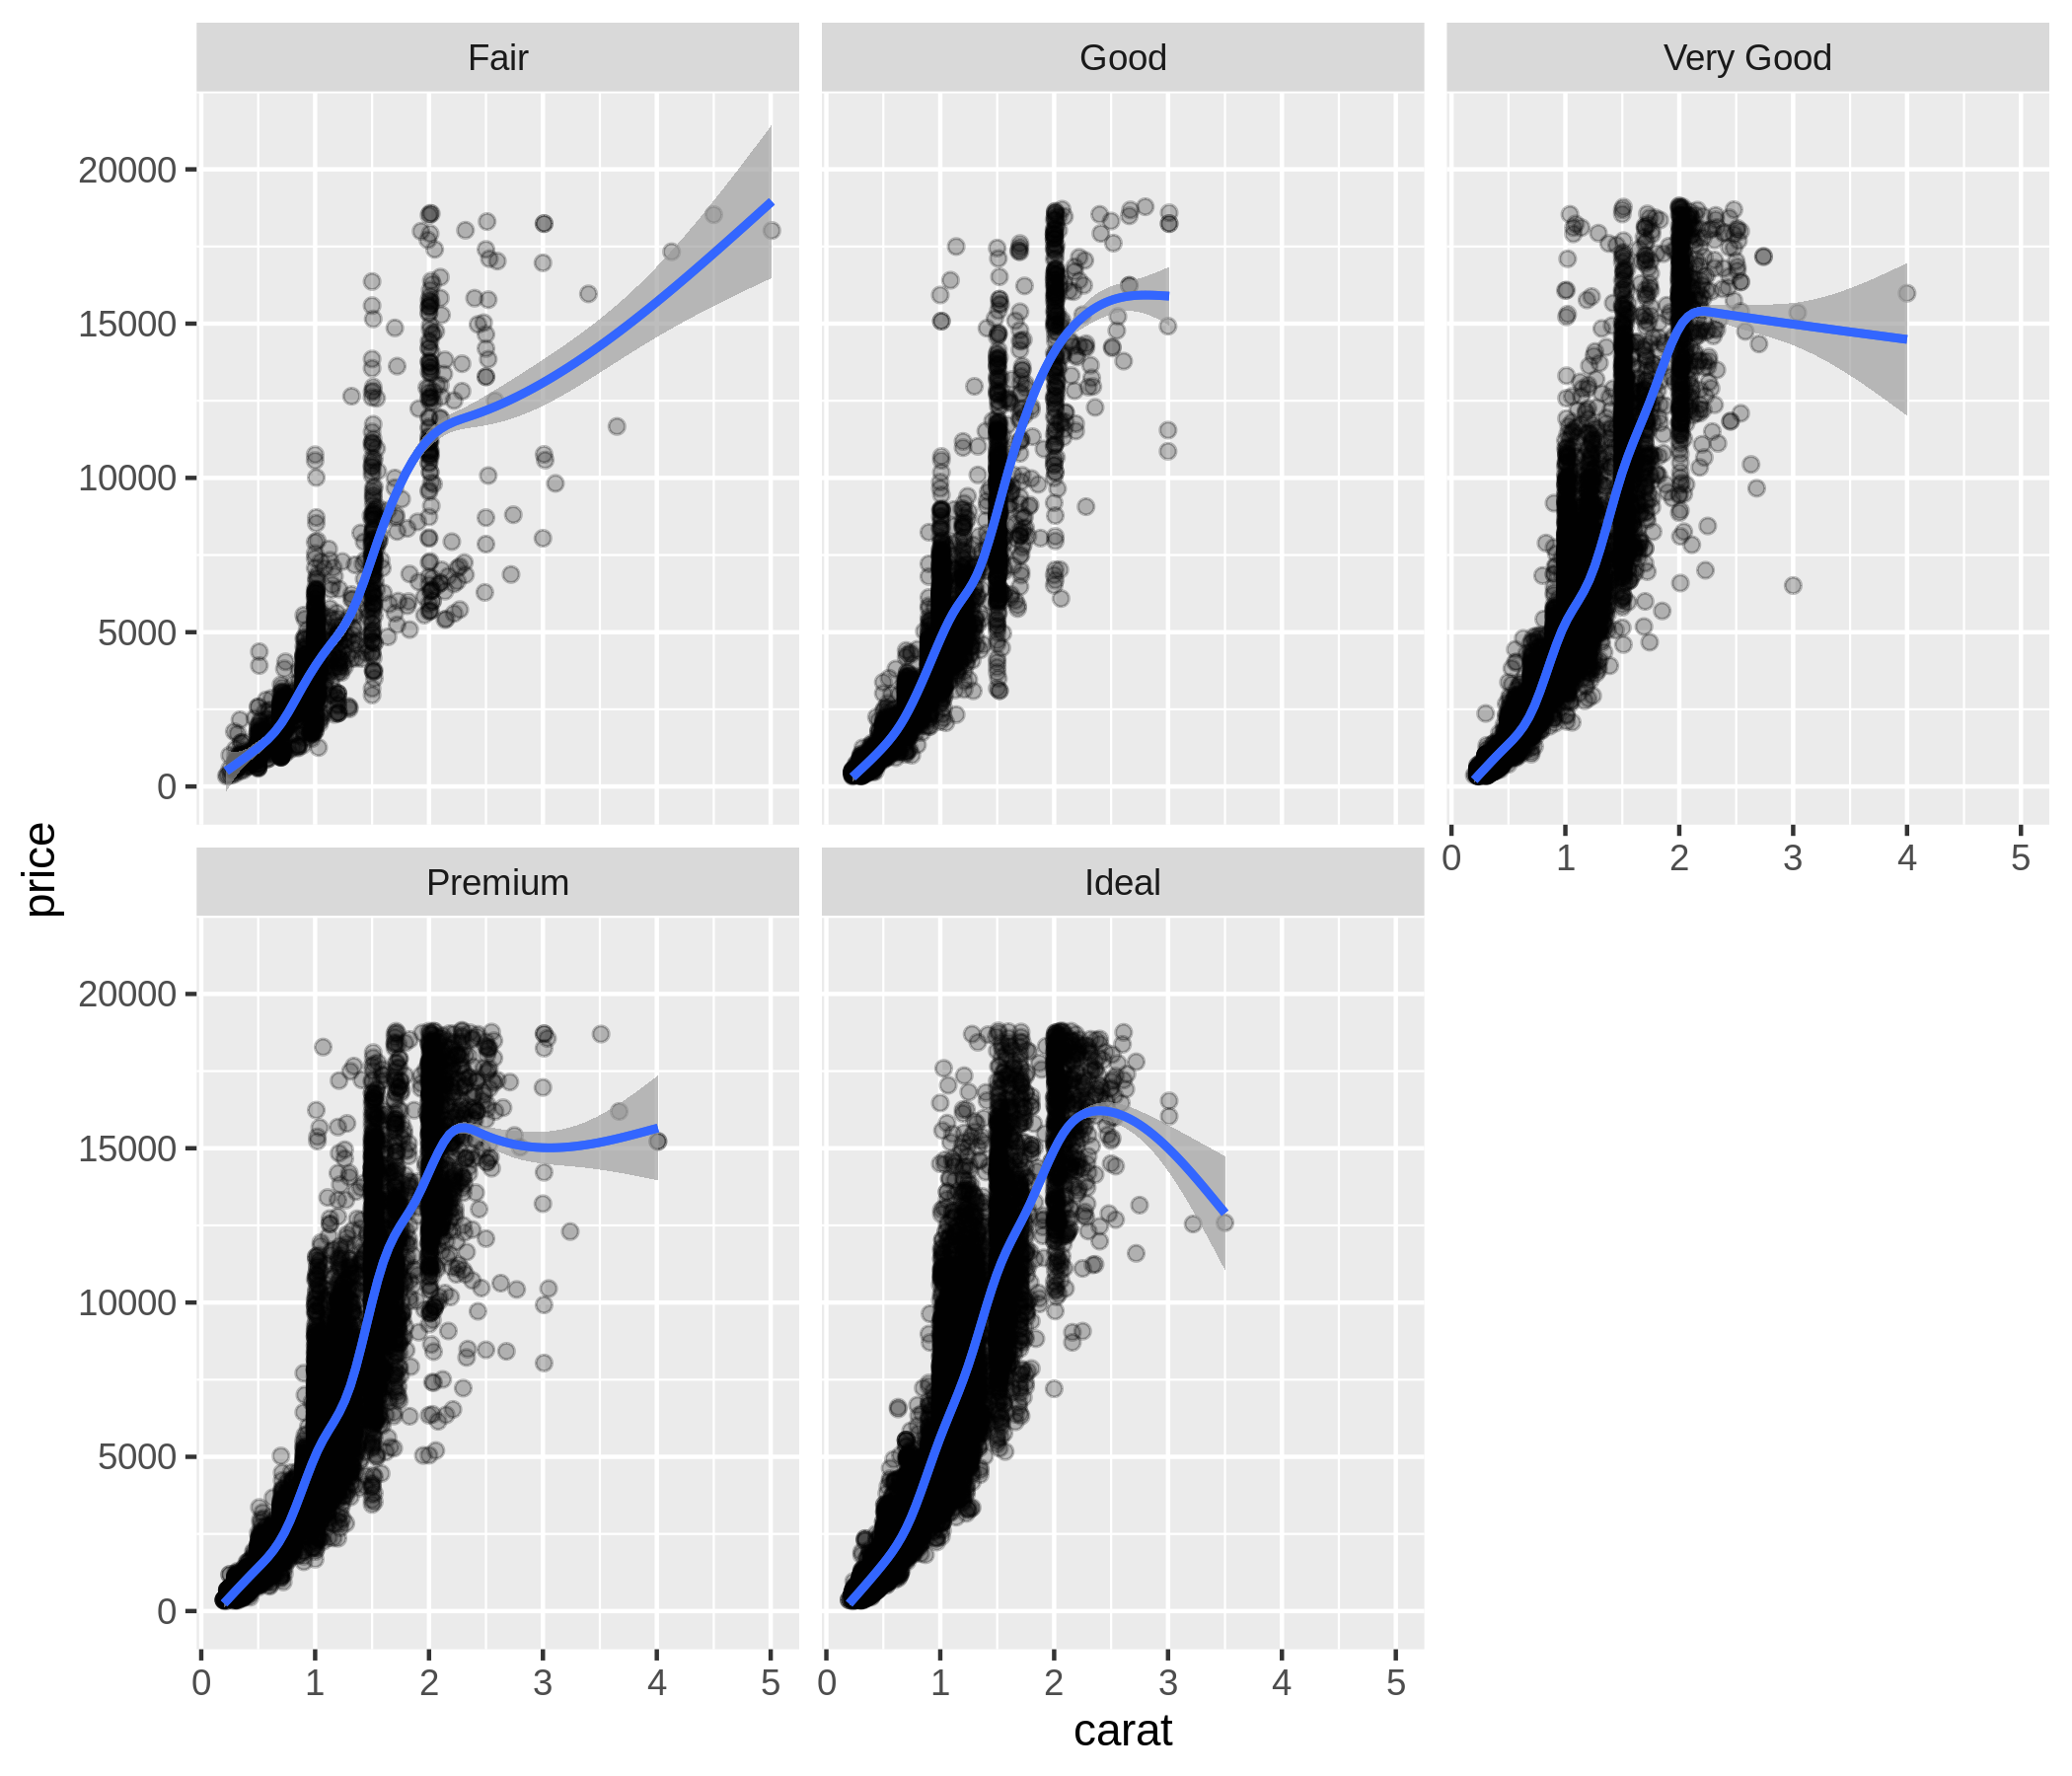

In [18]:
s=s+geom_smooth()
s